<a href="https://colab.research.google.com/github/SorrowAddict/SK-FLY-AI/blob/main/AI_Learning/Week-02_Machine_Learning/231228_2_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MNIST 데이터셋 CNN 실습

In [ ]:
import tensorflow as tf

# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0

# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 훈련
model.fit(x_train, y_train, epochs=5)

# 6. 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2002 - accuracy: 0.9407
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0791 - accuracy: 0.9761
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0532 - accuracy: 0.9832
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0365 - accuracy: 0.9881
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9780
테스트 정확도: 0.9779999852180481


### Fashion MNSIT 데이터셋 CNN 실습

In [ ]:
import tensorflow as tf

# # 1. MNIST 데이터셋 임포트
# mnist = tf.keras.datasets.mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# 1. Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 2. 데이터 전처리
train_images, test_images = train_images/255.0, test_images/255.0

# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),      ## CASE 1
    # tf.keras.layers.Dense(512, activation='relu'),    ## CASE 2
    # tf.keras.layers.Dense(1024, activation='relu'),   ## CASE 3
    tf.keras.layers.Dense(10, activation='softmax')
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 훈련
model.fit(train_images, train_labels, epochs=5)

# 6. 정확도 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5028 - accuracy: 0.8221
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3758 - accuracy: 0.8652
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3359 - accuracy: 0.8784
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3149 - accuracy: 0.8852
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3711 - accuracy: 0.8648
테스트 정확도: 0.864799976348877


In [ ]:
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


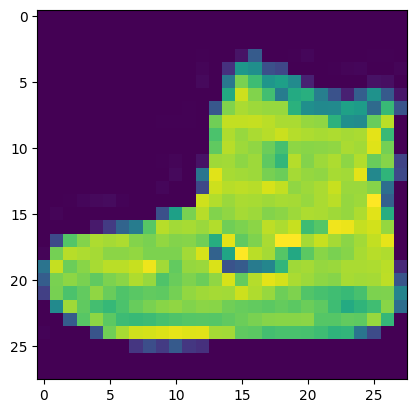

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0])

### shapes 데이터셋 CNN 실습

In [ ]:
import numpy as np
import os
print(os.getcwd())

/content


In [ ]:
# 디렉토리 위치 바꾸기
data_dir = os.chdir("/content/image")

In [ ]:
# 디렉토리 위치 바꾸기
data_dir = os.chdir("/content/squares")

In [ ]:
# 디렉토리 위치 바꾸기
data_dir = os.chdir("/content/triangles")

In [ ]:
import glob  #
from glob import glob

# 파일이름을 리스트 형태로 변환 하는데 사용
data_list = glob('*.png')
data_list[1:5]

['circles(43).png',
 'squares(71).png',
 'triangles(15).png',
 'triangles(19).png']

In [ ]:
# 리스트의 갯수
len(data_list)

300

In [ ]:
# prompt: from tensorflow.keras.models import Sequential from tensorflow.keras.layers import Embedding, LSTM, Dense from tensorflow.keras.preprocessing.text import Tokenizer from tensorflow.keras.preprocessing.sequence import pad_sequences를 pip install

!pip install tensorflow
!pip install tensorflow-datasets


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 케라스의  text_to_word_sequence 모듈을 로딩한다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence
text_to_word_sequence(data_list[0])

['squares', '66', 'png']

In [ ]:
# label 100개를 하였다고 가정하자
label = []
for n, path in enumerate(data_list[:100]):
    token = text_to_word_sequence(data_list[n])
    label.append(token[0])

In [ ]:
# label 인코드를 불러온다
from sklearn.preprocessing import LabelEncoder
items = label
encoder = LabelEncoder()
encoder.fit(items)
label = encoder.transform(items)

# lebel 디코딩 확인한다
encoder.inverse_transform(label)

array(['squares', 'circles', 'squares', 'triangles', 'triangles',
       'squares', 'circles', 'squares', 'circles', 'triangles', 'circles',
       'circles', 'circles', 'squares', 'squares', 'circles', 'squares',
       'squares', 'squares', 'circles', 'triangles', 'triangles',
       'triangles', 'triangles', 'triangles', 'squares', 'squares',
       'triangles', 'triangles', 'triangles', 'circles', 'triangles',
       'circles', 'triangles', 'circles', 'circles', 'triangles',
       'squares', 'squares', 'circles', 'circles', 'circles', 'squares',
       'circles', 'triangles', 'squares', 'squares', 'circles', 'squares',
       'squares', 'squares', 'triangles', 'triangles', 'circles',
       'squares', 'triangles', 'squares', 'triangles', 'triangles',
       'triangles', 'triangles', 'circles', 'squares', 'squares',
       'triangles', 'triangles', 'circles', 'squares', 'triangles',
       'squares', 'squares', 'triangles', 'squares', 'squares',
       'triangles', 'triangles', 'sq

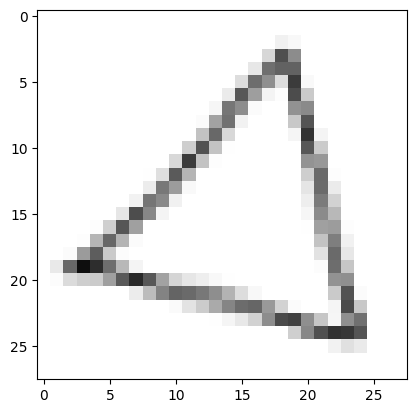

In [ ]:
# cv2 모듈을 불러 온다.
import cv2
from matplotlib import pyplot as plt

# 100번째 있는 사진의 샘플을 본다.
img = cv2.imread(data_list[100])
plt.imshow(img)
plt.show()

In [ ]:
# 이미지를 데이터 셋으로 변환 하고,  이것을 255로 나누어 0 ~ 1로 스케일 한다.
image = cv2.imread(data_list[0])/255
image.shape

(28, 28, 3)

In [ ]:
# 데이터 초기화
data_height = 28
data_width = 28
channel_n = 3

In [ ]:
# label 100개를 하였다고 가정하자
images = np.zeros((300, data_height, data_width, channel_n))
for n, path in enumerate(data_list[:300]):
    image = cv2.imread(data_list[n])
    image = cv2.resize(image, (data_height, data_width))
    images[n, :, :, :] =image

image.shape

(28, 28, 3)

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import cv2

# image initialization
data_height = 28
data_width = 28
channel_n = 3
batch_size = len(data_list)

# data processing 함수
from tensorflow.keras.preprocessing.text import text_to_word_sequence

def make_file(data_height, data_width, channel_n, batch_size):
    label = []
    images = np.zeros((batch_size, data_height, data_width, channel_n))
    for n, path in enumerate(data_list[:batch_size]):

    # lable
        token = text_to_word_sequence(data_list[n])
        label.append(token[0])

    # image transform
        image = cv2.imread(data_list[n])
        image = cv2.resize(image, (data_height, data_width))/255
        images[n, :, :, :] =image

    label = np.array(label)

    return (label, images)

# 함수를 이용하여 라벨과 이미지 데이터셋을 가져오기
(label, images) = make_file(data_height, data_width, channel_n, batch_size)

# 이미지 데이터 구조와 라벨 구조를 보기
print(images.shape, label.shape)

# 이미지 데이터 셋은 300장의 사진과 높이, 길이 각각 150 픽셀의 3채널이
# 들어 있고,   라벨은 300개 가 있다.

(300, 28, 28, 3) (300,)


In [ ]:
# data split train set, test set
from sklearn.model_selection import train_test_split
x = images
y = label

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1004)

# 데이터 셋이  나누어진 것에 대한 구조보기
print(X_train.shape, X_test.shape)

(240, 28, 28, 3) (60, 28, 28, 3)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# CNN model network
model_1 = Sequential([
    Conv2D(filters = 3, kernel_size = 3, activation = "relu"),
    Conv2D(filters = 3, kernel_size = 3, activation = "relu"),
    MaxPool2D(pool_size = 2, padding= "valid"),
    Conv2D(filters = 3, kernel_size = 3, activation = "relu"),
    Conv2D(filters = 3, kernel_size = 3, activation = "relu"),
    MaxPool2D(pool_size = 2, padding= "valid"),
    Flatten(),
    Dense(3, activation = "softmax")
])


In [ ]:
# 5. 모델 훈련
model_1.fit(X_train, y_train, epochs=5)

# 6. 정확도 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('테스트 정확도:', test_acc)

RuntimeError: ignored

In [ ]:
import tensorflow as tf

# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),      ## CASE 1
    # tf.keras.layers.Dense(512, activation='relu'),    ## CASE 2
    # tf.keras.layers.Dense(1024, activation='relu'),   ## CASE 3
    tf.keras.layers.Dense(10, activation='softmax')
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# X_train, X_test, y_train, y_test
# 5. 모델 훈련
model.fit(X_train, y_train, epochs=5)

# 6. 정확도 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('테스트 정확도:', test_acc)

Epoch 1/5


ValueError: ignored

In [ ]:


# 1. 데이터 불러오기
(train_images, train_labels), (test_images, test_labels) =

# 2. 데이터 전처리
train_images, test_images = train_images/255.0, test_images/255.0

# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),      ## CASE 1
    # tf.keras.layers.Dense(512, activation='relu'),    ## CASE 2
    # tf.keras.layers.Dense(1024, activation='relu'),   ## CASE 3
    tf.keras.layers.Dense(10, activation='softmax')
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 훈련
model.fit(train_images, train_labels, epochs=5)

# 6. 정확도 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)